# Logistic Regression on HR Analytics-Employee Resignation 
METRO COLLOEGE OF TECHNOLOGY

In [ ]:
Prepared by : Shalu Vavakunju
Instructor  : Gitimoni Saikia

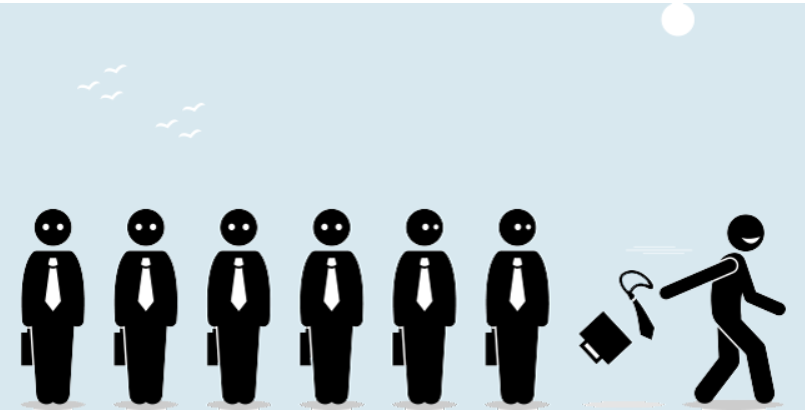

In [156]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [157]:
# import the data
df = pd.read_csv('data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [158]:
df.shape #showing number of rows and columns. 14999 rows and 10 columns

(14999, 10)

In [159]:
# Extract Column Names of a Pandas Dataframe
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [160]:
df.info() # Checking the data type of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [161]:
#check for missing values, and dataset damages.
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [162]:
print('Existence of null values: ',df.isnull().values.any())
print('Existence of NaN values: ',df.isna().values.any())

Existence of null values:  False
Existence of NaN values:  False


In [163]:
df['left'].value_counts(normalize=True) # checking the count of dependent variable

0    0.761917
1    0.238083
Name: left, dtype: float64

In [164]:
left = df[df['left'] == 1]


In [165]:
left.shape #dataset contains 3571 records of people who left the company

(3571, 10)

In [166]:
retained = df[df['left'] == 0]

In [167]:
retained.shape #dataset contains 11428 records of people who stays with the company

(11428, 10)

<AxesSubplot:xlabel='salary'>

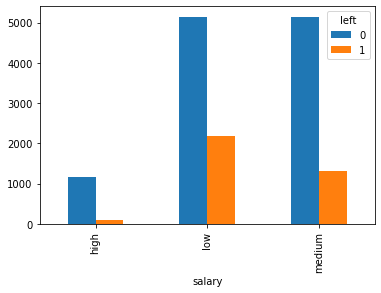

In [168]:
#analyzing salary and dependent variable
pd.crosstab(df['salary'], df['left']).plot(kind='bar') 
#We can see that the people with usually high salary did not leave the organization often as the people with low salary.

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


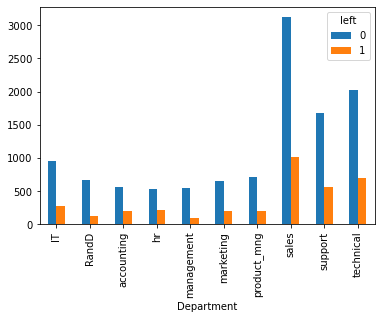

In [169]:
#analyzing department and dependent variable
pd.crosstab(df['Department'], df['left']).plot(kind = 'bar')
pd.crosstab(df.Department, df.left).style.background_gradient(cmap='summer_r')
#From the graph, it is understood that employees from Sales Department has left the organisation in greater numbers.

In [ ]:
sales department shows the highest number of resignation. Management shows the lowest number of resignation

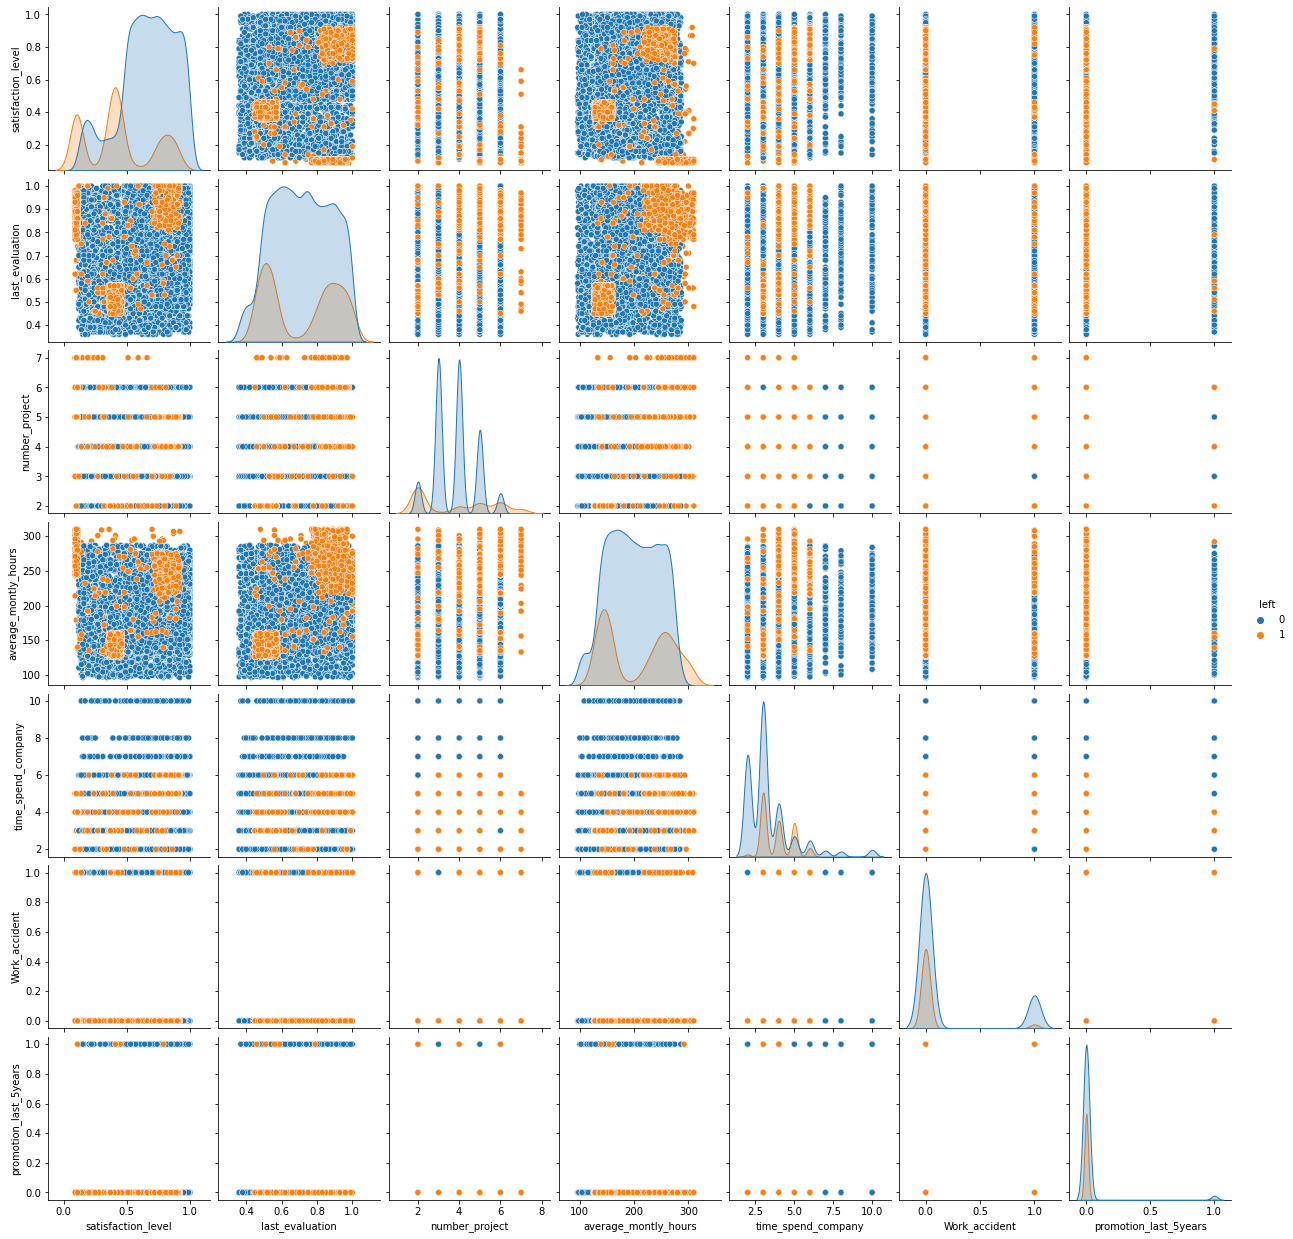

In [170]:
sns.pairplot(df, hue="left")

<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

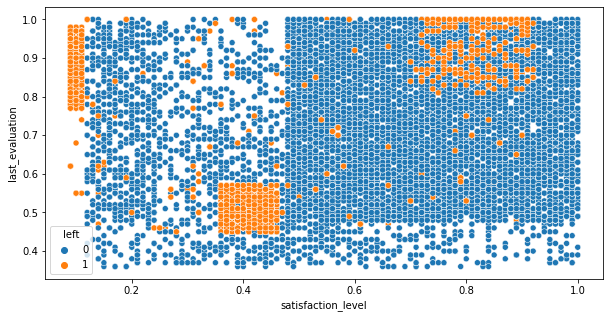

In [171]:
#Here I am checking the clustered data points from Satisfaction level with last_evaluation
fig=plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='satisfaction_level',y='last_evaluation',hue='left')

In [172]:
df_eva=df.loc[(df["left"] == 1) & (df["last_evaluation"] > 0.7) & (df["satisfaction_level"]>0.6)]
print('Resigned Cluster Average - Overall Average')
print(df_eva.mean()-df.mean())
print('-----------------------------')
print('Resigned Cluster Salary Range')
print(df_eva['salary'].value_counts())

Resigned Cluster Average - Overall Average
satisfaction_level        0.202746
last_evaluation           0.204754
number_project            0.747326
average_montly_hours     42.573715
time_spend_company        1.605775
Work_accident            -0.094772
left                      0.761917
promotion_last_5years    -0.020185
dtype: float64
-----------------------------
Resigned Cluster Salary Range
low       562
medium    349
high       12
Name: salary, dtype: int64


In [173]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [174]:
#shuffle the dataset for proper sampling
df.sample(frac = 1, random_state=1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
11908,0.67,0.39,2,207,7,0,0,0,sales,medium
10508,0.51,0.98,4,245,3,0,0,0,support,medium
9193,0.66,0.54,2,136,2,0,0,0,technical,low
13087,0.53,0.81,3,275,2,0,0,0,technical,low
506,0.83,0.98,4,259,5,0,1,0,support,medium
...,...,...,...,...,...,...,...,...,...,...
905,0.76,0.93,5,238,5,0,1,0,product_mng,low
5192,0.73,0.88,4,236,3,1,0,0,technical,low
12172,0.11,0.78,7,278,4,0,1,0,sales,low
235,0.83,0.85,4,255,5,0,1,0,management,low


In [175]:
# filtering continuous variables without target variable for Correlation to df_x
df_x=df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department']]
df_x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department
0,0.38,0.53,2,157,3,0,0,sales
1,0.80,0.86,5,262,6,0,0,sales
2,0.11,0.88,7,272,4,0,0,sales
3,0.72,0.87,5,223,5,0,0,sales
4,0.37,0.52,2,159,3,0,0,sales


# Correlation Matrix & Heatmap

In [176]:
#Correlation Matrix-checking the linear association between the independent variables
#-1 indicates a perfectly negative linear correlation between two variables
# 0 indicates no linear correlation between two variables
# 1 indicates a perfectly positive linear correlation between two variables
corr = df_x.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


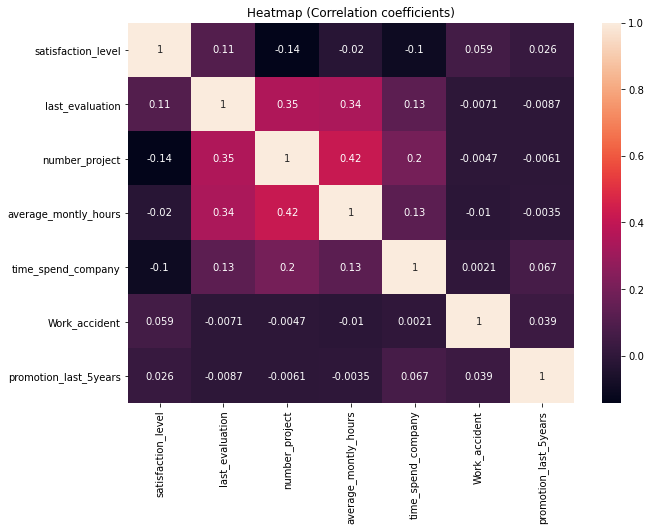

In [177]:
plt.figure(figsize = (10, 7))
sns.heatmap(corr, annot = True, color = 'yellow')
plt.title('Heatmap (Correlation coefficients)')
plt.show()

In [178]:
#copying data to df_lr
df_lr=df.copy()
df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [179]:
df_lr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Encoding

In [25]:
#Encode using dummy variable encoding assuming the categorical variables are nominal

In [180]:
data=pd.get_dummies(df_lr,columns=['salary','Department'])
data.head()  # showing encoded data for salary and department variables

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Extract dependent and independent variables

In [181]:
y=data['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [182]:
y.value_counts()
#showing imbalanced data, will deal this in logistic regression method

0    11428
1     3571
Name: left, dtype: int64

In [183]:
X=data.drop(['left'],axis='columns') # getting independent variables in X
X.head() #showing the independent variables and data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [184]:
#Ensuring that all variables are numeric now
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0
salary_high,14999.0,0.082472,0.275092,0.00,0.00,0.00,0.00,1.0
salary_low,14999.0,0.487766,0.499867,0.00,0.00,0.00,1.00,1.0
salary_medium,14999.0,0.429762,0.495059,0.00,0.00,0.00,1.00,1.0


In [185]:
#feature scaling as the range of values for different features vary a lot
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X),columns = X.columns)
X_scaled.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
0,0.318681,0.265625,0.0,0.285047,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.780220,0.781250,0.6,0.775701,0.500,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.021978,0.812500,1.0,0.822430,0.250,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.692308,0.796875,0.6,0.593458,0.375,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.307692,0.250000,0.0,0.294393,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# k-fold cross validation

In [187]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=5).mean()

0.7699106591085918

# Modelling data by splitting to Train and Test

Let's also look at the test scores of a simple split

In [188]:
#Split into training and test set for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.30)
#30% data for test and 70% for train
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical
1670,0.384615,0.328125,0.0,0.210280,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13378,0.505495,0.937500,0.2,0.457944,0.125,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10233,0.692308,0.484375,0.6,0.532710,0.000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4719,0.956044,0.609375,0.4,0.378505,0.000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7003,0.956044,0.281250,0.2,0.476636,0.125,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [189]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 
# showing the row and column count for Test and train data of both dependent and independent variables

((10499, 20), (4500, 20), (10499,), (4500,))

In [190]:
y_train.value_counts()

0    7966
1    2533
Name: left, dtype: int64

# Logistic Regression

In [191]:
# train the model on the training set
model = LogisticRegression(max_iter=500, tol=0.001, class_weight={0:1, 1:2})
model.fit(X_train,y_train)

LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=500, tol=0.001)

In [192]:
#Test accuracy
model.score(X_test,y_test) # accuracy estimated by model is .79 which is not bad but can be improved by using more resignee data

0.7893333333333333

# Classification Report

In [193]:
#Let's look at some other scores as well
#Predicting the test set data
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3462
           1       0.53      0.67      0.59      1038

    accuracy                           0.79      4500
   macro avg       0.71      0.75      0.73      4500
weighted avg       0.81      0.79      0.80      4500



In [194]:
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [195]:
accuracy_score(y_test,y_pred)

0.7893333333333333

# Confusion Matrix

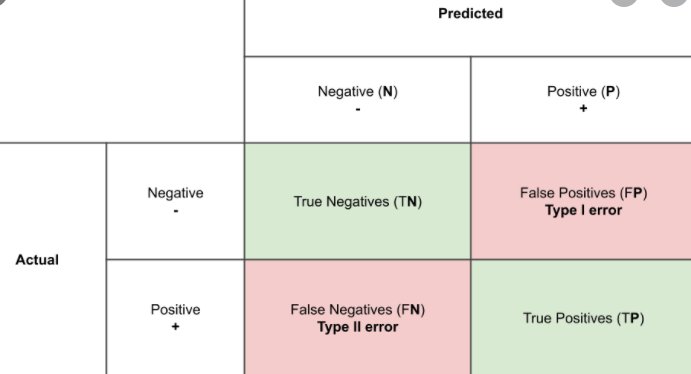

In [196]:
print(confusion_matrix(y_test,y_pred))

[[2861  601]
 [ 347  691]]


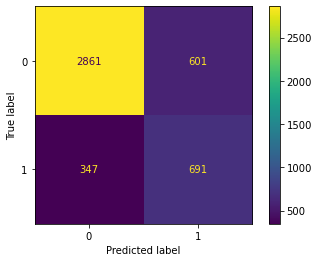

In [197]:
plot_confusion_matrix(model,X_test,y_test)

ROC AUC SCORE:  0.8288222028542201


Text(0, 0.5, 'True Positive Rate')

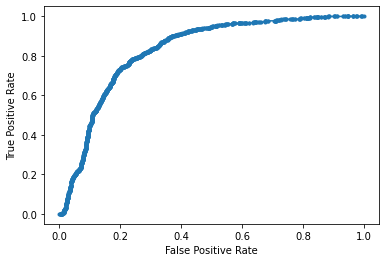

In [198]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) 
#for different probability threshold values
#AUC is the area under the ROC curve
from sklearn.metrics import roc_auc_score,roc_curve

y_proba=model.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
print("ROC AUC SCORE: ",roc_auc_score(y_test, y_proba[:, 1]))
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_proba[:,1])
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')